In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import krippendorff

In [179]:
df = pd.read_json("/home/blitt/projects/podcasts/annotation/hostGuestAnnotation/annotation_output/annotated_instances.jsonl", orient="records", lines=True)

In [182]:
df.head() 

,id,displayed_text,label_annotations,span_annotations,behavioral_data,annotation
0,https://mcdn.podbean.com/mf/web/tzczx5/stream_...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'guest': '2'}},{},{'time_string': 'Time spent: 0d 0h 0m 13s '},2
1,https://pdst.fm/e/dts.podtrac.com/redirect.mp3...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'host': '1'}},{},{'time_string': 'Time spent: 0d 0h 0m 11s '},1
2,https://anchor.fm/s/24044d44/podcast/play/1450...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 7s '},3
3,https://api.spreaker.com/download/episode/3435...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 14s '},3
4,https://www.buzzsprout.com/482779/2787439-tips...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'guest': '2'}},{},{'time_string': 'Time spent: 0d 0h 0m 31s '},2


In [183]:
#df = df.explode(["label_annotations"]).reset_index(drop=True)
dictList = list(df["label_annotations"])
labels = [int(list(item["sentiment"].values())[0]) for item in dictList]
df["annotation"] = labels

In [184]:
df["annotation"].value_counts()

annotation
1    121
3    119
2    107
4     13
Name: count, dtype: int64

In [185]:
itemDf = df[["id", "annotation"]].groupby("id").agg(list)

In [186]:
itemDf["len"] = itemDf["annotation"].apply(len)

In [193]:
from collections import Counter 

In [194]:
uniqueCounts = itemDf["annotation"].apply(lambda x: len(set(x)))
Counter(uniqueCounts)

Counter({1: 64, 2: 52, 3: 4})

In [195]:
itemDf["uniqueCounts"] = uniqueCounts

In [197]:
from scipy.stats import mode

In [204]:
itemDf["modalVal"] = itemDf["annotation"].apply(lambda x: mode(x)[0])

In [206]:
itemDf.loc[itemDf["uniqueCounts"] == 1, "modeVal"].value_counts()

InvalidIndexError: (id
http://dts.podtrac.com/redirect.mp3/feeds.soundcloud.com/stream/834697933-siggraph-spotlight-35-real-time-ray-tracing-and-realism.mp3                            True
http://media.blubrry.com/champion_magazine_podcast/http://feeds.soundcloud.com/stream/830604499-user-350863618-student-athletes-on-returning-to-campus.mp3      False
http://www.podtrac.com/pts/redirect.mp3/feeds.soundcloud.com/stream/828546106-the-public-morality-public-morality-5-21-20-show.mp3                              False
https://anchor.fm/s/10a2a41c/podcast/play/13495013/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-9%2F71483363-16000-1-84b35e574c55d.mp3      True
https://anchor.fm/s/11028184/podcast/play/14212379/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-24%2F76170728-44100-2-109d447b04488.mp3     True
                                                                                                                                                                ...  
https://www.buzzsprout.com/981694/3880895-episode-3-coming-to-america.mp3                                                                                        True
https://www.buzzsprout.com/998860/3752489-corneal-ulcers-in-dogs-cats-and-horses-e9.mp3                                                                         False
https://www.podtrac.com/pts/redirect.mp3/chrt.fm/track/22GG1/traffic.megaphone.fm/CBS8923643029.mp3                                                             False
https://www.podtrac.com/pts/redirect.mp3/chrt.fm/track/GF1E57/traffic.megaphone.fm/TAMC8212833222.mp3                                                           False
https://www.podtrac.com/pts/redirect.mp3/nbaa.org/wp-content/uploads/news/flight-plan/nbaa-flight-plan-20200525.mp3                                              True
Name: uniqueCounts, Length: 120, dtype: bool, 'modeVal')

In [29]:
annots = list(itemDf["annotation"])
outAnnots = []
for currAnnots in annots: 
    currOut = []
    for i in range(3): 
        if i >= len(currAnnots): 
            currOut.append(np.nan)
        else: 
            currOut.append(currAnnots[i])
    outAnnots.append(currOut)

In [32]:
itemDf[["r1", "r2", "r3"]] = outAnnots
reliabilityData = [list(itemDf[col]) for col in ["r1", "r2", "r3"]]
krippendorff.alpha(reliability_data=reliabilityData)

0.5398492500765227

In [40]:
noUncertainty = itemDf[itemDf["annotation"].apply(lambda x: 4 not in x)]


In [42]:
reliabilityData = [list(noUncertainty[col]) for col in ["r1", "r2", "r3"]]
krippendorff.alpha(reliability_data=reliabilityData)

0.6226005675179436

In [75]:
#get Ben's labels
bensLabels = pd.read_json("/home/blitt/projects/podcasts/annotation/pilot2BensAnnotations.jsonl", orient="records", lines=True)
dictList = list(bensLabels["label_annotations"])
labels = [int(list(item["sentiment"].values())[0]) for item in dictList]
bensLabels["annotation"] = labels

In [76]:
bensLabels = bensLabels.set_index("id")[["annotation"]]

In [77]:
bensLabels

,annotation
id,
https://pdcn.co/e/traffic.libsyn.com/secure/quantum-week/EP_28_mix.mp3?dest-id=1797188,3
https://www.buzzsprout.com/482779/2787439-tips-for-working-with-equestrian-brands-with-gem-eventing.mp3,2
https://chrt.fm/track/E9887/pdcn.co/e/podcasts.captivate.fm/media/57b75f47-0699-4b8f-854f-92bef9f099d1/anne-yatch.mp3,1
https://pdcn.co/e/mcdn.podbean.com/mf/web/u8qw0j/rockymountainbu5wu.mp3,3
https://anchor.fm/s/7f12654/podcast/play/14320049/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fstaging%2F2020-4-26%2F76850511-44100-2-e778a17d843dd.m4a,1
https://api.spreaker.com/download/episode/34357059/7555210.mp3,3
https://anchor.fm/s/5a54f9c/podcast/play/14095984/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-21%2F75411892-32000-1-075b756a0ad1.mp3,4
https://feeds.soundcloud.com/stream/820205203-visualartistsireland-get-together-2017-artistic-freedom-keynote.mp3,1
https://anchor.fm/s/533b6a0c/podcast/play/29720506/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fstaging%2F2021-2-23%2F168068580-44100-2-f58e59f757781bc2.m4a,1


In [79]:
#bensLabels = pd.concat([bensLabels.reset_index(drop=True), itemDf[["r1", "r2", "r3"]].head(20).reset_index(drop=True)], axis=1)
bensLabels = pd.merge(bensLabels, itemDf.drop(columns=["annotation", "len"]), left_index=True, right_index=True, how="left")

,annotation,r1,r2,r3
id,,,,
https://pdcn.co/e/traffic.libsyn.com/secure/quantum-week/EP_28_mix.mp3?dest-id=1797188,3,3,4,3
https://www.buzzsprout.com/482779/2787439-tips-for-working-with-equestrian-brands-with-gem-eventing.mp3,2,2,2,2
https://chrt.fm/track/E9887/pdcn.co/e/podcasts.captivate.fm/media/57b75f47-0699-4b8f-854f-92bef9f099d1/anne-yatch.mp3,1,1,1,1
https://pdcn.co/e/mcdn.podbean.com/mf/web/u8qw0j/rockymountainbu5wu.mp3,3,3,3,3
https://anchor.fm/s/7f12654/podcast/play/14320049/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fstaging%2F2020-4-26%2F76850511-44100-2-e778a17d843dd.m4a,1,1,1,1
https://api.spreaker.com/download/episode/34357059/7555210.mp3,3,3,3,3
https://anchor.fm/s/5a54f9c/podcast/play/14095984/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-21%2F75411892-32000-1-075b756a0ad1.mp3,4,3,3,3
https://feeds.soundcloud.com/stream/820205203-visualartistsireland-get-together-2017-artistic-freedom-keynote.mp3,1,2,2,4
https://anchor.fm/s/533b6a0c/podcast/play/29720506/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fstaging%2F2021-2-23%2F168068580-44100-2-f58e59f757781bc2.m4a,1,1,1,1


In [81]:
itemDf.head() 


,annotation,len,r1,r2,r3
id,,,,,
http://dts.podtrac.com/redirect.mp3/feeds.soundcloud.com/stream/834697933-siggraph-spotlight-35-real-time-ray-tracing-and-realism.mp3,"[1, 1, 1]",3,1,1,1
http://media.blubrry.com/champion_magazine_podcast/http://feeds.soundcloud.com/stream/830604499-user-350863618-student-athletes-on-returning-to-campus.mp3,"[2, 2, 1]",3,2,2,1
http://www.podtrac.com/pts/redirect.mp3/feeds.soundcloud.com/stream/828546106-the-public-morality-public-morality-5-21-20-show.mp3,"[4, 1, 1]",3,4,1,1
https://anchor.fm/s/10a2a41c/podcast/play/13495013/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-9%2F71483363-16000-1-84b35e574c55d.mp3,"[3, 3, 3]",3,3,3,3
https://anchor.fm/s/11028184/podcast/play/14212379/https%3A%2F%2Fd3ctxlq1ktw2nl.cloudfront.net%2Fproduction%2F2020-4-24%2F76170728-44100-2-109d447b04488.mp3,"[2, 2, 2]",3,2,2,2


In [47]:
bensLabels

,id,displayed_text,label_annotations,span_annotations,behavioral_data,annotation,r1,r2,r3
0,https://pdcn.co/e/traffic.libsyn.com/secure/qu...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 17s '},3,NaN,NaN,NaN
1,https://www.buzzsprout.com/482779/2787439-tips...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'guest': '2'}},{},{'time_string': 'Time spent: 0d 0h 0m 17s '},2,NaN,NaN,NaN
2,https://chrt.fm/track/E9887/pdcn.co/e/podcasts...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'host': '1'}},{},{'time_string': 'Time spent: 0d 0h 0m 6s '},1,NaN,NaN,NaN
3,https://pdcn.co/e/mcdn.podbean.com/mf/web/u8qw...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 13s '},3,NaN,NaN,NaN
4,https://anchor.fm/s/7f12654/podcast/play/14320...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'host': '1'}},{},{'time_string': 'Time spent: 0d 0h 0m 2s '},1,NaN,NaN,NaN
5,https://api.spreaker.com/download/episode/3435...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 10s '},3,NaN,NaN,NaN
6,https://anchor.fm/s/5a54f9c/podcast/play/14095...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'unsure': '4'}},{},{'time_string': 'Time spent: 0d 0h 0m 20s '},4,NaN,NaN,NaN
7,https://feeds.soundcloud.com/stream/820205203-...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'host': '1'}},{},{'time_string': 'Time spent: 0d 0h 0m 10s '},1,NaN,NaN,NaN
8,https://anchor.fm/s/533b6a0c/podcast/play/2972...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'host': '1'}},{},{'time_string': 'Time spent: 0d 0h 0m 11s '},1,NaN,NaN,NaN
9,https://rss.art19.com/episodes/1b7d5ba6-c7be-4...,<span style='background-color:#00FF00'>Target ...,{'sentiment': {'neither': '3'}},{},{'time_string': 'Time spent: 0d 0h 0m 8s '},3,NaN,NaN,NaN


In [224]:
#we can try to get order of assignment? 
dataDf = pd.read_json("/home/blitt/projects/podcasts/annotation/hostGuestAnnotation/data_files/2kpodsClassification.jsonl", orient="records", lines=True)

In [225]:
dataDf["order"] = range(0, len(dataDf))

In [226]:
ordered = pd.merge(df, dataDf[["id", "order"]], on ="id", how="inner").sort_values("order").reset_index(drop=True)

In [227]:
orderedGrouped = ordered[["annotation", "order"]].groupby("order").agg(len).reset_index()

In [228]:
max(ordered["order"])

239

In [229]:
import numpy as np

Text(0.5, 0, 'instance number')

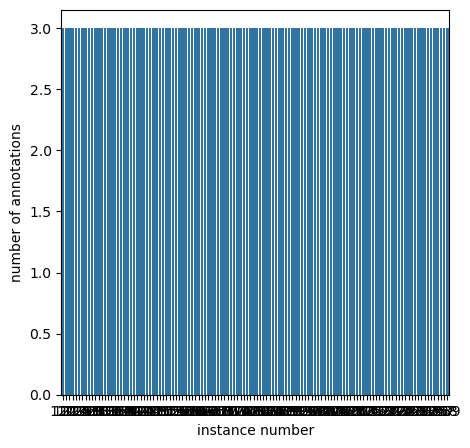

In [230]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(orderedGrouped, x="order", y="annotation", ax=ax)
plt.ylabel("number of annotations")
plt.xlabel("instance number")

In [15]:
itemDf.head() 

NameError: name 'itemDf' is not defined